In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from tqdm.auto import tqdm
from aging.plotting import save_factory, format_plots, figure, legend

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
format_plots()

In [4]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/dana_ontogeny_males_syllable_df_v00.parquet')
min_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_syllable_df_v00.parquet')


In [5]:
df.columns

Index(['experiment', 'file', 'uuid', 'date', 'age', 'syllables', 'true_depth',
       'session_name', 'subject_name', 'timestamps', 'raw_timestamps',
       'area_mm', 'area_px', 'centroid_x_mm', 'centroid_x_px', 'centroid_y_mm',
       'centroid_y_px', 'height_ave_mm', 'length_mm', 'length_px',
       'velocity_2d_mm', 'velocity_2d_px', 'velocity_3d_mm', 'velocity_3d_px',
       'width_mm', 'width_px', 'angle', 'velocity_theta', 'recon_width',
       'recon_length', 'recon_height', 'recon_area', 'onsets', 'mouse'],
      dtype='object')

## Measure rearing frequency

In [6]:
dana_out = {}
for (age, mouse, uuid), _df in tqdm(
    df.groupby(["age", "subject_name", "uuid"], sort=False)
):
    height = _df["height_ave_mm"].rolling(11, center=True).median()
    demeaned_height = height - height.quantile(0.1)
    # demeaned_height = height - height.median()
    thresh = demeaned_height.std() * 2
    mask = demeaned_height > thresh
    rear_counts = (mask.astype(int).diff() == 1).sum() / (len(mask) / 30)
    dana_out[(age, mouse, uuid)] = {
        "rear_counts": rear_counts,
        "area": _df.loc[~mask, "area_px"].median(),
        "recon_area": _df.loc[~mask, "recon_area"].median(),
    }

  0%|          | 0/215 [00:00<?, ?it/s]

In [7]:
min_out = {}
for (age, mouse, uuid), _df in tqdm(
    min_df.groupby(["age", "subject_name", "uuid"], sort=False)
):
    height = _df["height_ave_mm"].rolling(11, center=True).median()
    demeaned_height = height - height.quantile(0.1)
    # demeaned_height = height - height.median()
    thresh = demeaned_height.std() * 2
    mask = demeaned_height > thresh
    rear_counts = (mask.astype(int).diff() == 1).sum() / (len(mask) / 30)
    min_out[(age, mouse, uuid)] = {
        "rear_counts": rear_counts,
        "area": _df.loc[~mask, "area_px"].median(),
        "recon_area": _df.loc[~mask, "recon_area"].median(),
    }

  0%|          | 0/363 [00:00<?, ?it/s]

In [8]:
out_df = pd.DataFrame(dana_out).T
out_df.index.names = ['age', 'mouse', 'uuid']
out_df = out_df.reset_index()
out_df['experiment'] = 'dana'
out_df2 = pd.DataFrame(min_out).T
out_df2.index.names = ['age', 'mouse', 'uuid']
out_df2 = out_df2.reset_index()
out_df2['experiment'] = 'min'
out_df = pd.concat([out_df, out_df2], ignore_index=True)

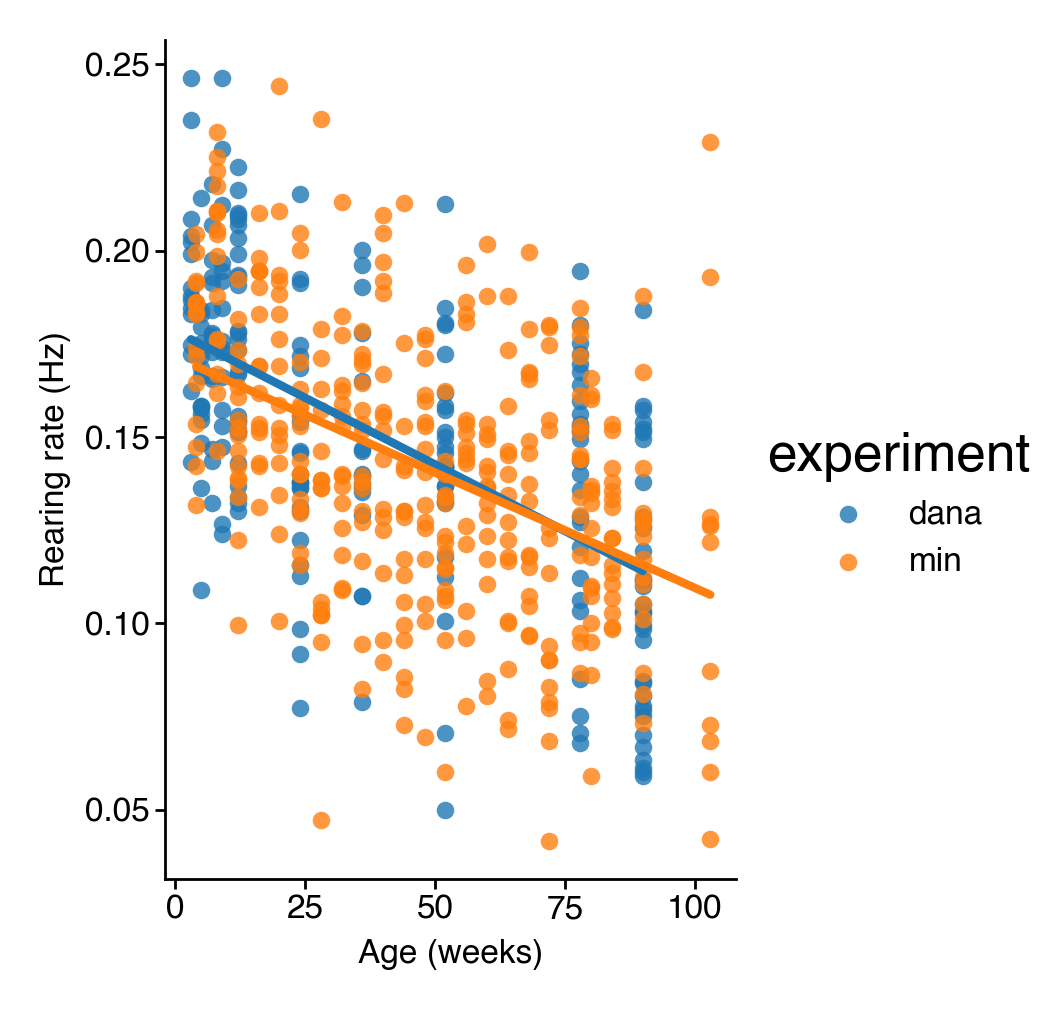

In [9]:
g = sns.lmplot(data=out_df, x='age', y='rear_counts', hue='experiment', ci=None, scatter_kws={'linewidths': 0, 's': 10}, height=2.5, aspect=0.8)
g.set_xlabels('Age (weeks)')
g.set_ylabels('Rearing rate (Hz)') 

## Model-free running

In [10]:
dana_out = {}
for (age, mouse, uuid), _df in tqdm(
    df.groupby(["age", "subject_name", "uuid"], sort=False)
):
    speed = _df["velocity_2d_mm"].rolling(11, center=True).median()
    demeaned_speed = speed - speed.quantile(0.1)
    # demeaned_speed = speed - speed.median()
    thresh = demeaned_speed.std() * 2
    mask = demeaned_speed > thresh
    run_counts = (mask.astype(int).diff() == 1).sum() / (len(mask) / 30)
    dana_out[(age, mouse, uuid)] = {
        "run_counts": run_counts,
        "area": _df.loc[~mask, "area_px"].median(),
        "recon_area": _df.loc[~mask, "recon_area"].median(),
    }

  0%|          | 0/215 [00:00<?, ?it/s]

In [11]:
min_out = {}
for (age, mouse, uuid), _df in tqdm(
    min_df.groupby(["age", "subject_name", "uuid"], sort=False)
):
    speed = _df["velocity_2d_mm"].rolling(11, center=True).median()
    demeaned_speed = speed - speed.quantile(0.1)
    # demeaned_speed = speed - speed.median()
    thresh = demeaned_speed.std() * 2
    mask = demeaned_speed > thresh
    run_counts = (mask.astype(int).diff() == 1).sum() / (len(mask) / 30)
    min_out[(age, mouse, uuid)] = {
        "run_counts": run_counts,
        "area": _df.loc[~mask, "area_px"].median(),
        "recon_area": _df.loc[~mask, "recon_area"].median(),
    }

  0%|          | 0/363 [00:00<?, ?it/s]

In [12]:
out_df_speed = pd.DataFrame(dana_out).T
out_df_speed.index.names = ['age', 'mouse', 'uuid']
out_df_speed = out_df_speed.reset_index()
out_df_speed['experiment'] = 'dana'
out_df_speed2 = pd.DataFrame(min_out).T
out_df_speed2.index.names = ['age', 'mouse', 'uuid']
out_df_speed2 = out_df_speed2.reset_index()
out_df_speed2['experiment'] = 'min'
out_df_speed = pd.concat([out_df_speed, out_df_speed2], ignore_index=True)

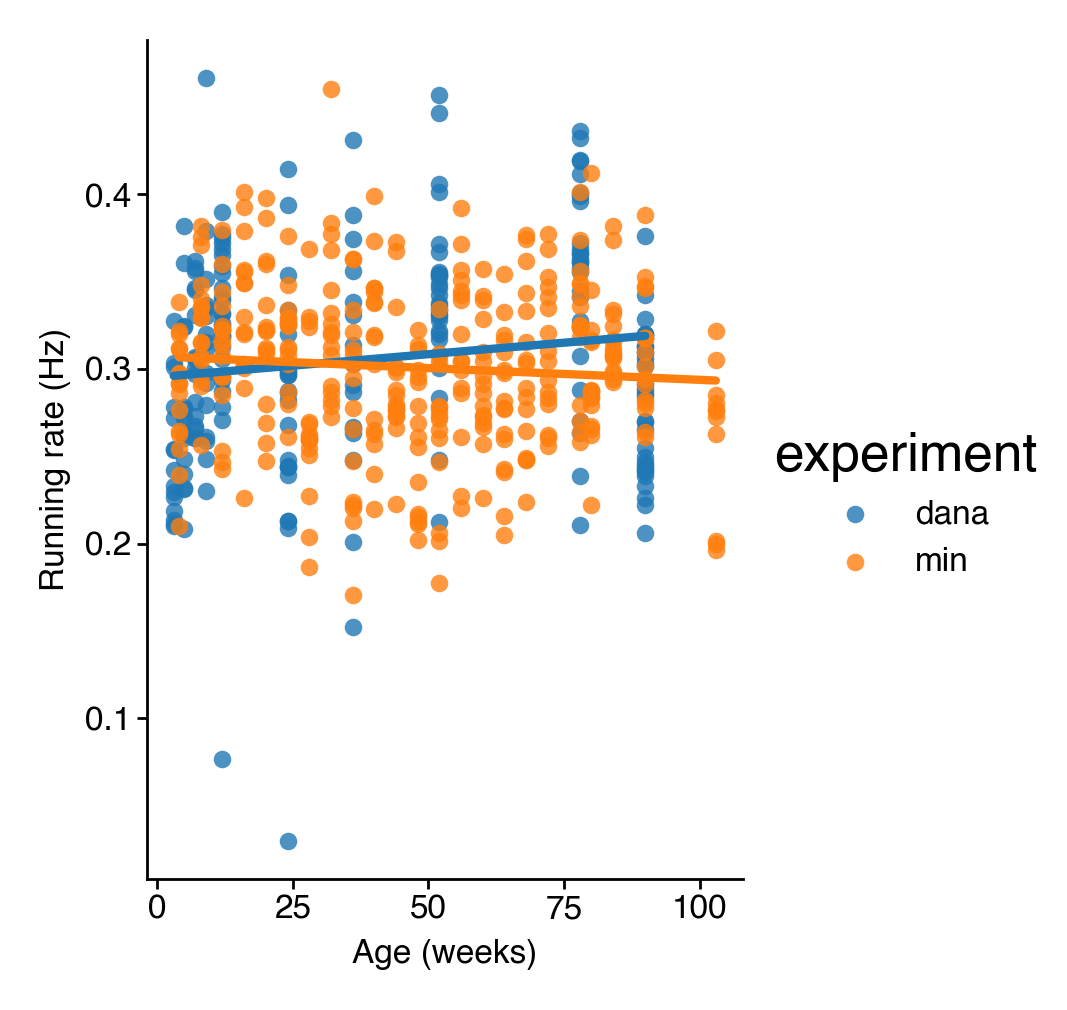

In [13]:
g = sns.lmplot(
    data=out_df_speed,
    x="age",
    y="run_counts",
    hue="experiment",
    ci=None,
    scatter_kws={"linewidths": 0, "s": 10},
    height=2.5,
    aspect=0.8,
)
g.set_xlabels("Age (weeks)")
g.set_ylabels("Running rate (Hz)")

## Animal speed

In [16]:
dana_out = df.groupby(["age", "subject_name", "uuid"], sort=False)['velocity_2d_mm'].quantile(0.9) * 30
min_out = min_df.groupby(["age", "subject_name", "uuid"], sort=False)['velocity_2d_mm'].quantile(0.9) * 30

In [17]:
dana_out = dana_out.reset_index()
dana_out['experiment'] = 'dana'
min_out = min_out.reset_index()
min_out['experiment'] = 'min'
out_df_speed = pd.concat([dana_out, min_out], ignore_index=True)

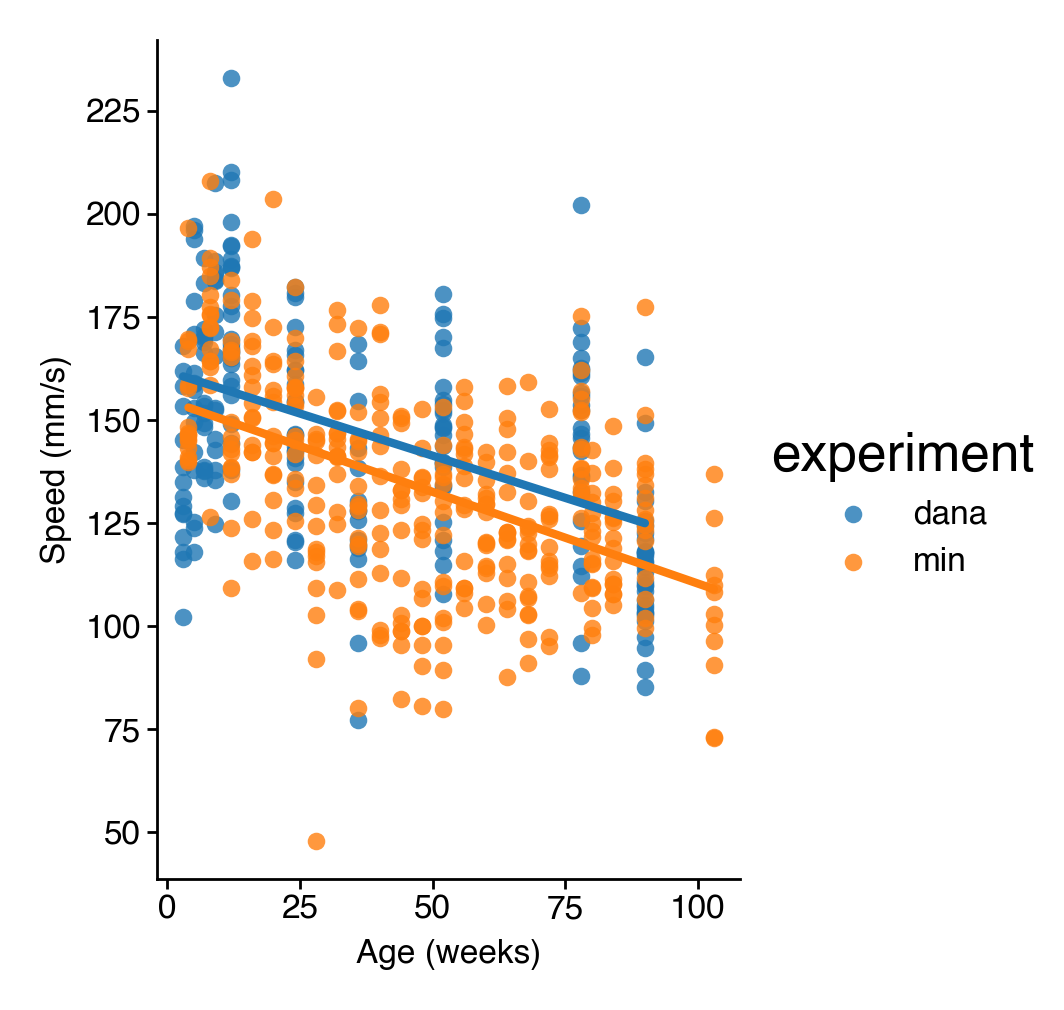

In [20]:
g = sns.lmplot(
    data=out_df_speed,
    x="age",
    y="velocity_2d_mm",
    hue="experiment",
    ci=None,
    scatter_kws={"linewidths": 0, "s": 10},
    height=2.5,
    aspect=0.8,
)
g.set_xlabels("Age (weeks)")
g.set_ylabels("Speed (mm/s)")

In [21]:
df.columns

Index(['experiment', 'file', 'uuid', 'date', 'age', 'syllables', 'true_depth',
       'session_name', 'subject_name', 'timestamps', 'raw_timestamps',
       'area_mm', 'area_px', 'centroid_x_mm', 'centroid_x_px', 'centroid_y_mm',
       'centroid_y_px', 'height_ave_mm', 'length_mm', 'length_px',
       'velocity_2d_mm', 'velocity_2d_px', 'velocity_3d_mm', 'velocity_3d_px',
       'width_mm', 'width_px', 'angle', 'velocity_theta', 'recon_width',
       'recon_length', 'recon_height', 'recon_area', 'onsets', 'mouse'],
      dtype='object')

## Turning

In [37]:
dana_out = {}
for (age, mouse, uuid), _df in tqdm(
    df.groupby(["age", "subject_name", "uuid"], sort=False)
):
    angle = _df['angle'].rolling(3, center=True).mean().diff().abs()
    thresh = angle.std()
    turn = angle[angle > thresh]
    dana_out[(age, mouse, uuid)] = {
        "turn": turn.sum(),
    }

  0%|          | 0/215 [00:00<?, ?it/s]

In [38]:
min_out = {}
for (age, mouse, uuid), _df in tqdm(
    min_df.groupby(["age", "subject_name", "uuid"], sort=False)
):
    angle = _df['angle'].rolling(3, center=True).mean().diff().abs()
    thresh = angle.std()
    turn = angle[angle > thresh]
    min_out[(age, mouse, uuid)] = {
        "turn": turn.sum(),
    }

  0%|          | 0/363 [00:00<?, ?it/s]

In [39]:
out_df_turn = pd.DataFrame(dana_out).T
out_df_turn.index.names = ['age', 'mouse', 'uuid']
out_df_turn = out_df_turn.reset_index()
out_df_turn['experiment'] = 'dana'
out_df_turn2 = pd.DataFrame(min_out).T
out_df_turn2.index.names = ['age', 'mouse', 'uuid']
out_df_turn2 = out_df_turn2.reset_index()
out_df_turn2['experiment'] = 'min'
out_df_turn = pd.concat([out_df_turn, out_df_turn2], ignore_index=True)

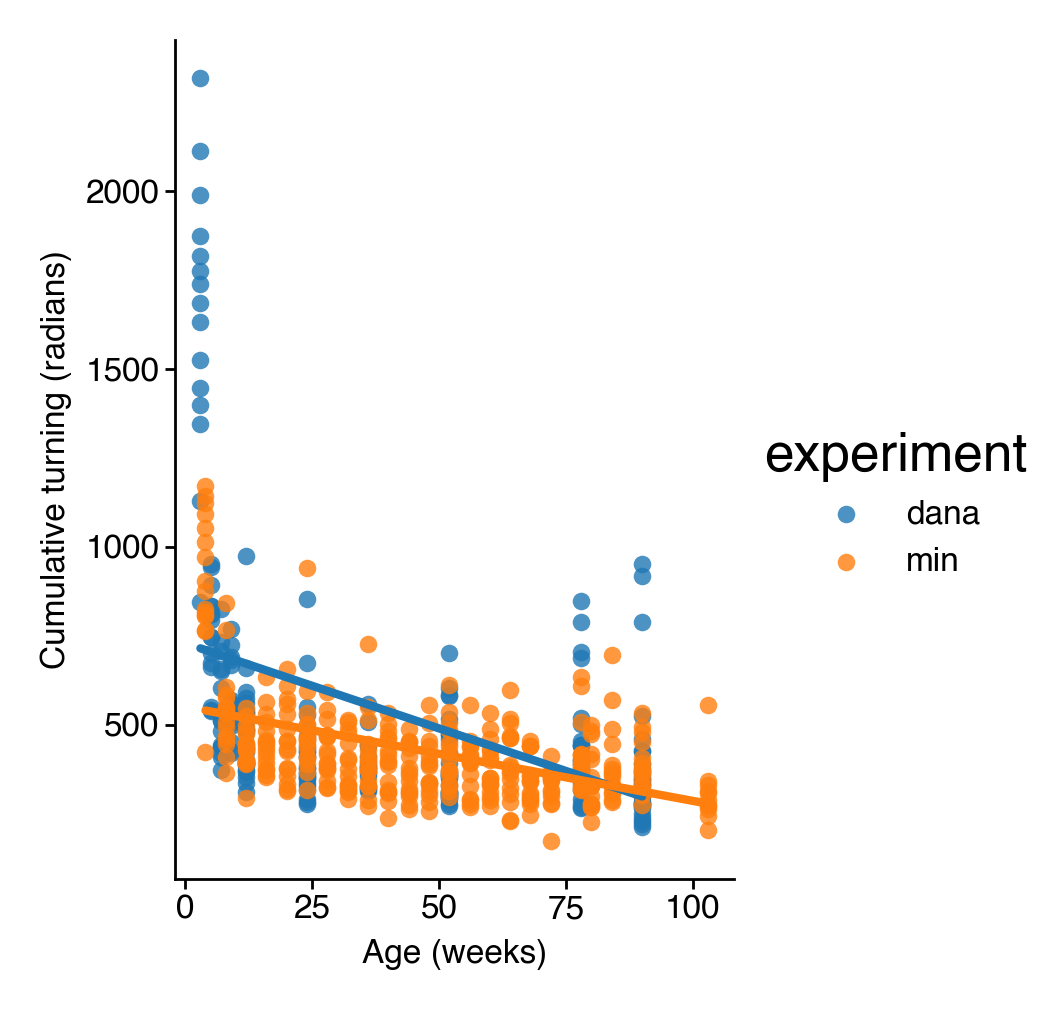

In [41]:
g = sns.lmplot(
    data=out_df_turn,
    x="age",
    y="turn",
    hue="experiment",
    ci=None,
    scatter_kws={"linewidths": 0, "s": 10},
    height=2.5,
    aspect=0.8,
)
g.set_xlabels("Age (weeks)")
g.set_ylabels("Cumulative turning (radians)")

## Mouse area

In [48]:
dana_out = df.groupby(["age", "subject_name", "uuid"], sort=False)[['area_px', 'recon_area']].median() * 30
min_out = min_df.groupby(["age", "subject_name", "uuid"], sort=False)[['area_px', 'recon_area']].median() * 30

In [49]:
dana_out = dana_out.reset_index()
dana_out['experiment'] = 'dana'
min_out = min_out.reset_index()
min_out['experiment'] = 'min'
out_df_speed = pd.concat([dana_out, min_out], ignore_index=True)

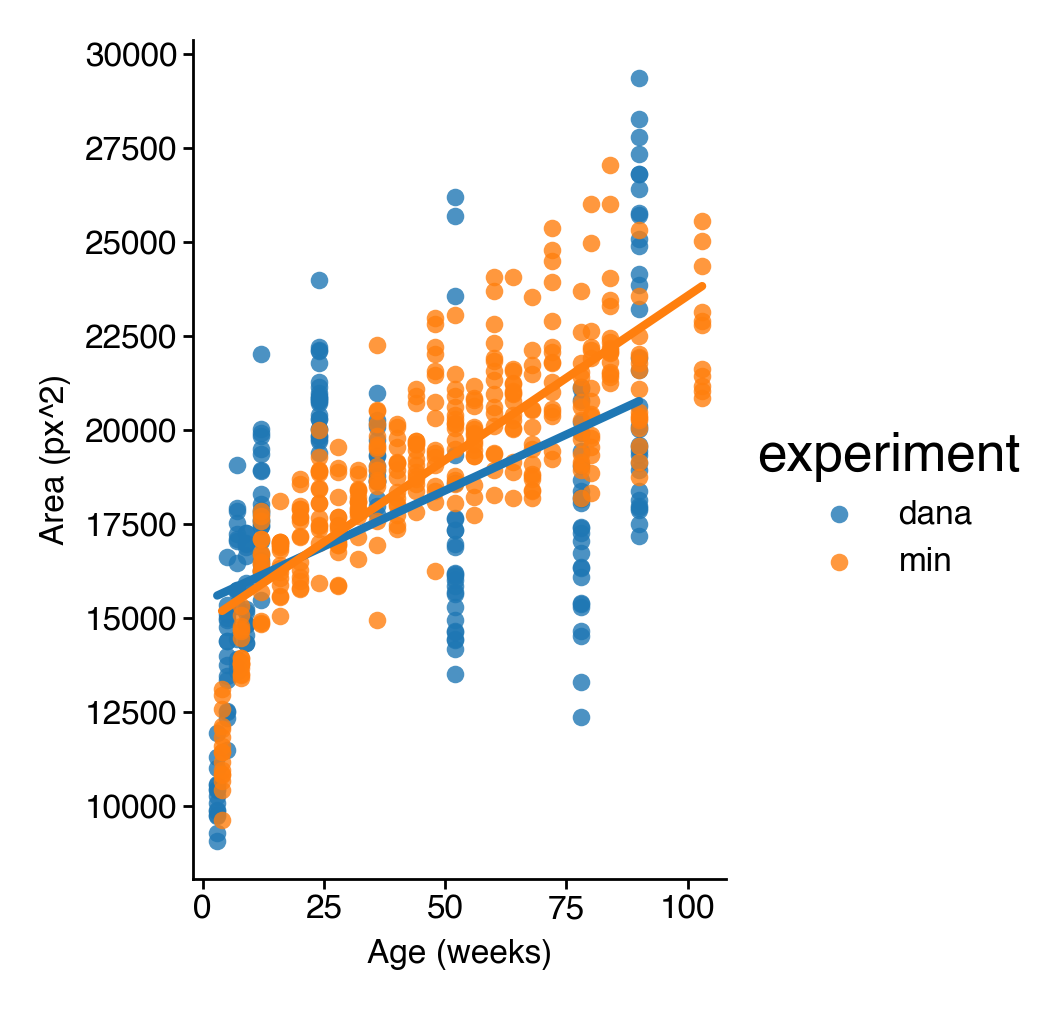

In [47]:
g = sns.lmplot(
    data=out_df_speed,
    x="age",
    y="area_px",
    hue="experiment",
    ci=None,
    scatter_kws={"linewidths": 0, "s": 10},
    height=2.5,
    aspect=0.8,
)
g.set_xlabels("Age (weeks)")
g.set_ylabels("Area (px^2)")

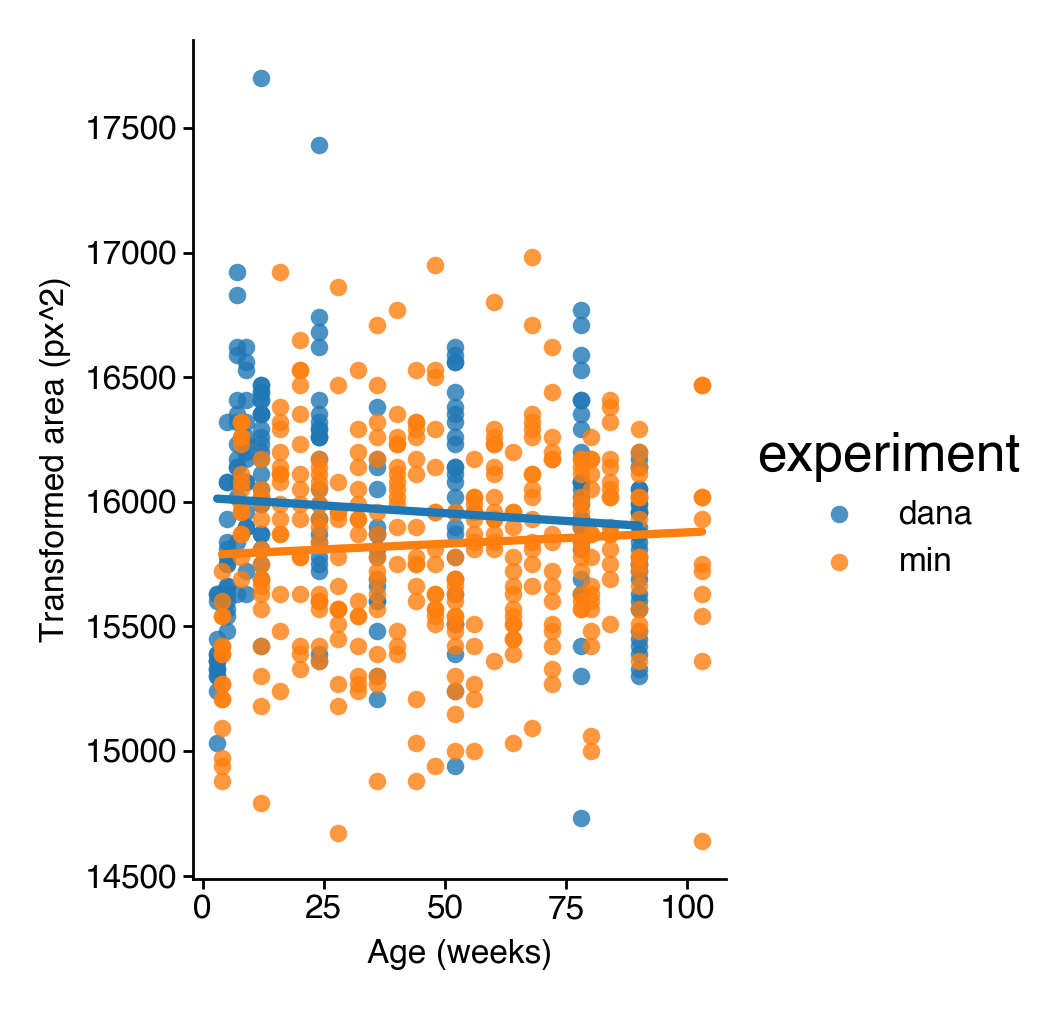

In [50]:
g = sns.lmplot(
    data=out_df_speed,
    x="age",
    y="recon_area",
    hue="experiment",
    ci=None,
    scatter_kws={"linewidths": 0, "s": 10},
    height=2.5,
    aspect=0.8,
)
g.set_xlabels("Age (weeks)")
g.set_ylabels("Transformed area (px^2)")

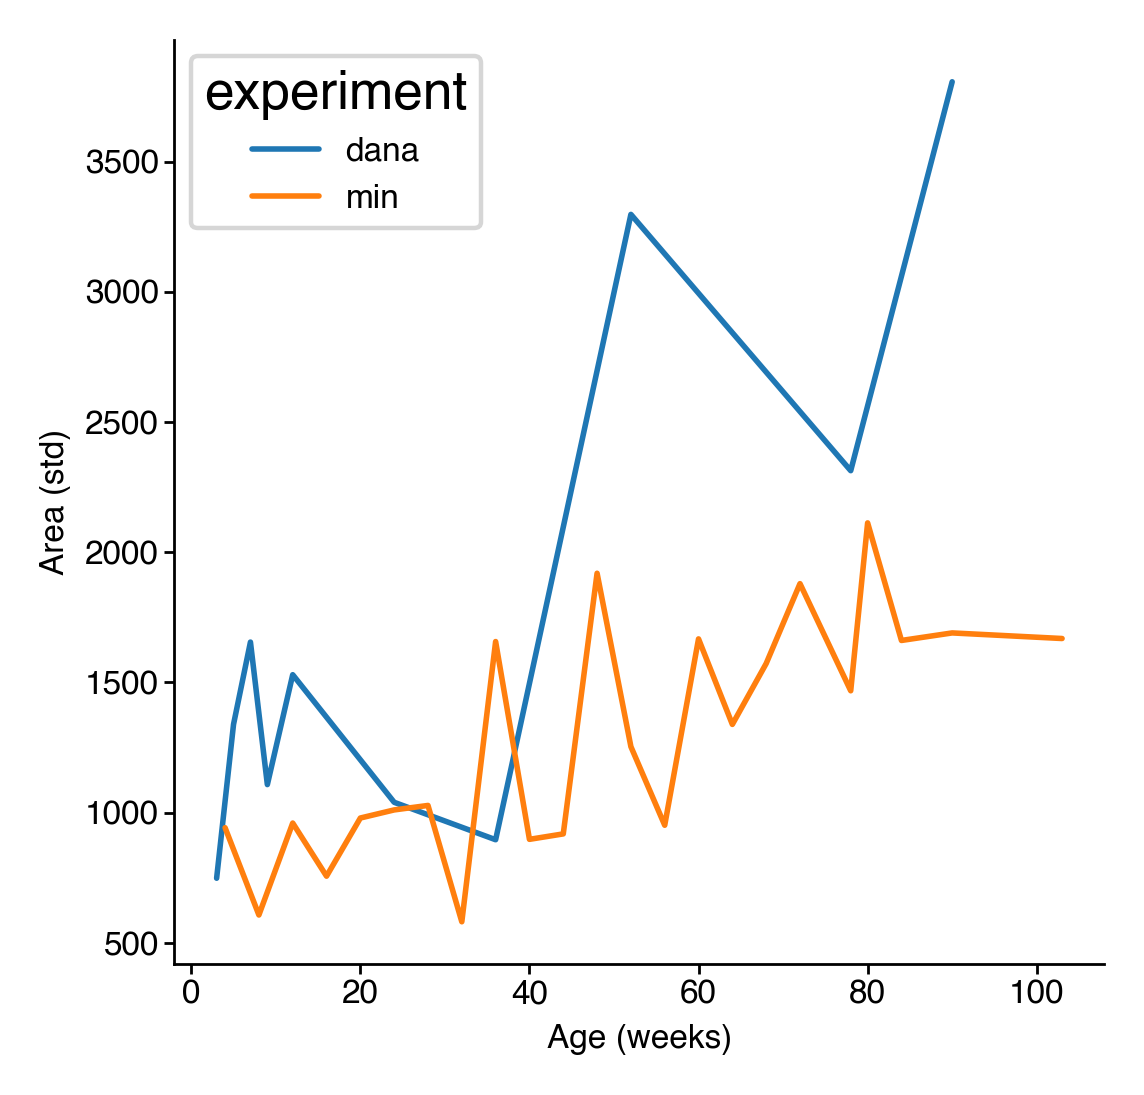

In [59]:
ax = sns.lineplot(
    data=out_df_speed.groupby(["age", "experiment"])
    .std(numeric_only=True)
    .sort_index(level=0)
    .reset_index(),
    x="age",
    y="area_px",
    hue="experiment",
)
ax.set(xlabel="Age (weeks)", ylabel="Area (std)")
sns.despine()

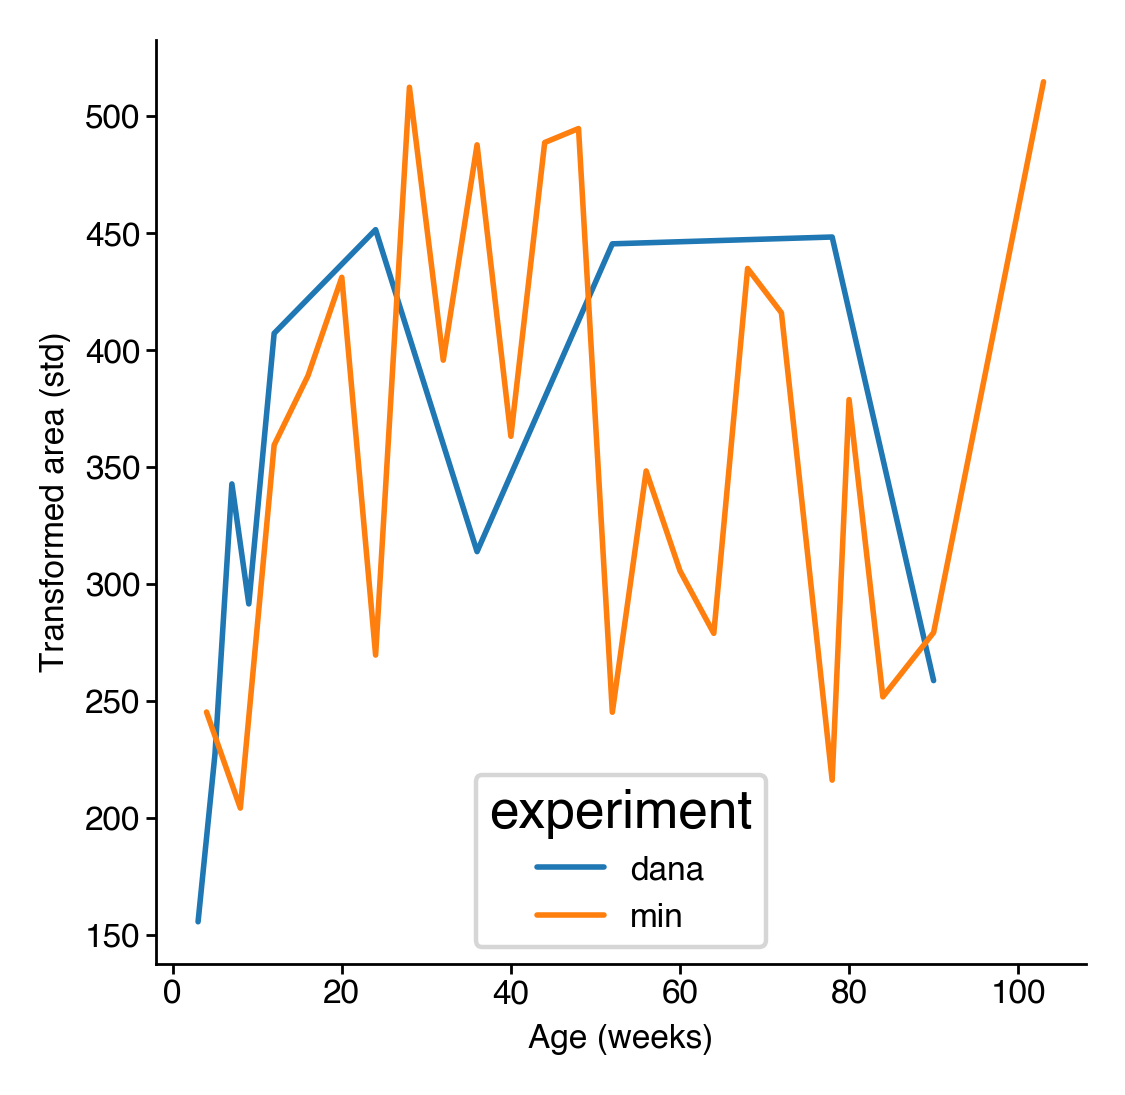

In [60]:
ax = sns.lineplot(
    data=out_df_speed.groupby(["age", "experiment"])
    .std(numeric_only=True)
    .sort_index(level=0)
    .reset_index(),
    x="age",
    y="recon_area",
    hue="experiment",
)
ax.set(xlabel="Age (weeks)", ylabel="Transformed area (std)")
sns.despine()